# Langkah #4 - Analisa Korelasi Variabel
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Di dataset terdapat tiga atribut bertipe kategorikal, maka dari itu agak tricky untuk menghitung korelasi dengan atribut bertipe data kategorikal. Ada dua solusi yang dapat dilakukan:
1. Jangan melibatkan data kategorikal untuk menghitung korelasi.
2. Ubah data kategorikal menjadi data numerik, bisa dengan mapping nilai unik. Namun, solusi ini tetap ada masalah karena metode perhitungan akan menganggap nilai numerik tersebut seperti tipe data ordinal.
---

1. Jangan melibatkan data kategorikal untuk menghitung korelasi.
Bisa menggunakan method `corr()` pada Pandas DataFrame. Pada method `corr()` kita menggunakan parameter `pearson`, yaitu menggunakan teknik perhitungan **Pearson Correlation Coefficient**.

<AxesSubplot: >

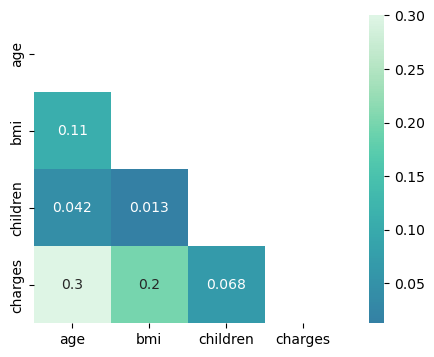

In [3]:
data_corr = df[['age', 'bmi', 'children', 'charges']].corr(method='pearson')
mask = np.triu(np.ones_like(data_corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 4))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr, mask=mask, cmap='mako', vmax=0.3, center=0, square=True, annot=True)

Dari grafik Heatmap di atas terlihat bahwa yang memiliki korelasi tinggi hanyalah atribut `age`-`charges` dan `bmi`-`charges`.

2. Ubah data kategorikal menjadi data numerik, bisa dengan mapping nilai unik. 
Namun, solusi ini tetap ada masalah karena metode perhitungan akan menganggap nilai numerik tersebut seperti tipe data ordinal.

In [4]:
# Mapping atribut kategorikal
some_map = {label:idx for idx, label in enumerate(np.unique(df['sex']))}
df['sex_map'] = df['sex'].map(some_map)
some_map = {label:idx for idx, label in enumerate(np.unique(df['region']))}
df['region_map'] = df['region'].map(some_map)
some_map = {label:idx for idx, label in enumerate(np.unique(df['smoker']))}
df['smoker_map'] = df['smoker'].map(some_map)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_map,region_map,smoker_map
0,19,female,27.900,0,yes,southwest,16884.92400,0,3,1
1,18,male,33.770,1,no,southeast,1725.55230,1,2,0
2,28,male,33.000,3,no,southeast,4449.46200,1,2,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0


Untuk mengatasi tipe atribut ordinal kita bisa menggunakan teknik korelasi lainnya selain `pearson`, yaitu `spearman` yang dimasukkan ke dalam method `corr()`.

<AxesSubplot: >

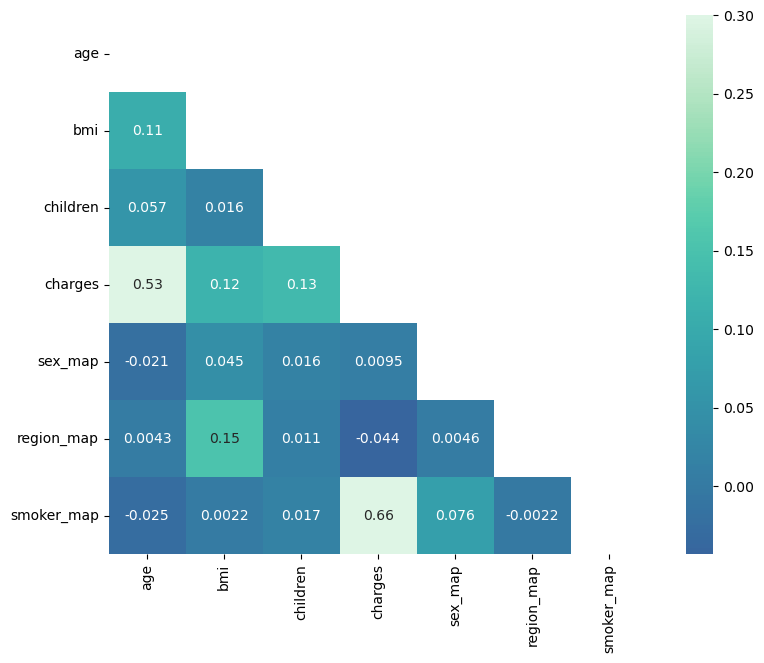

In [5]:
# Gunakan method corr()
data_corr = df[['age', 'bmi', 'children', 'charges', 'sex_map', 'region_map', 'smoker_map']].corr(method='spearman')
mask = np.triu(np.ones_like(data_corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr, mask=mask, cmap='mako', vmax=0.3, center=0, square=True, annot=True)

Berbeda dengan solusi pertama, dengan cara mapping atribut kategorikal kita bisa mendapatkan korelasi baru yaitu `charges`-`smoker_map`.